<h1>Лабораторна робота 1</h1>
<h3>Товстоноженко Михайло ФБ-31мп</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
dataset = "SaYoPillow.csv"

In [3]:
data = pd.read_csv(dataset)

In [4]:
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
columns = {'sr':"snoring rate", 'rr':"respiration rate", 'bt':"body temperature", 
           'lm':"limb movement", 'bo':"blood oxygen", 'em':"eye movement", 'sh':"sleeping hours", 
           'hr':"heart rate", 'sl':"stress level"}

In [6]:
data.columns = columns.values()
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [7]:
data.style

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.800000,25.680000,91.840000,16.600000,89.840000,99.600000,1.840000,74.200000,3
1,91.640000,25.104000,91.552000,15.880000,89.552000,98.880000,1.552000,72.760000,3
2,60.000000,20.000000,96.000000,10.000000,95.000000,85.000000,7.000000,60.000000,1
3,85.760000,23.536000,90.768000,13.920000,88.768000,96.920000,0.768000,68.840000,3
4,48.120000,17.248000,97.872000,6.496000,96.248000,72.480000,8.248000,53.120000,0
5,56.880000,19.376000,95.376000,9.376000,94.064000,83.440000,6.376000,58.440000,1
6,47.000000,16.800000,97.200000,5.600000,95.800000,68.000000,7.800000,52.000000,0
7,50.000000,18.000000,99.000000,8.000000,97.000000,80.000000,9.000000,55.000000,0
8,45.280000,16.112000,96.168000,4.224000,95.112000,61.120000,7.112000,50.280000,0
9,55.520000,19.104000,95.104000,9.104000,93.656000,82.760000,6.104000,57.760000,1


In [8]:
data.shape

(630, 9)

In [9]:
data.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

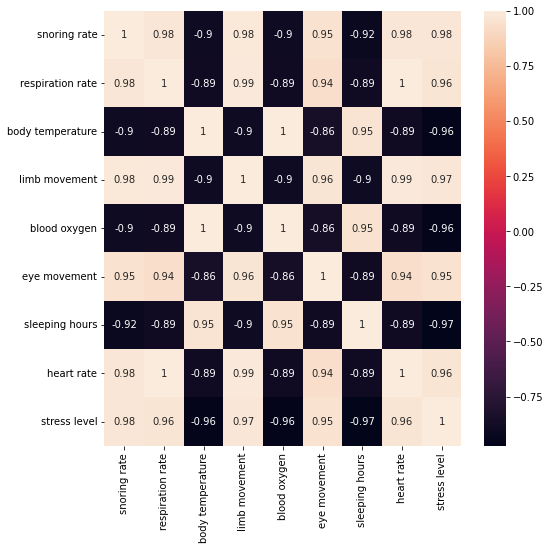

In [11]:
plt.figure(figsize = (8,8))
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.yticks(rotation=0)
plt.show()

In [12]:
columns

{'sr': 'snoring rate',
 'rr': 'respiration rate',
 'bt': 'body temperature',
 'lm': 'limb movement',
 'bo': 'blood oxygen',
 'em': 'eye movement',
 'sh': 'sleeping hours',
 'hr': 'heart rate',
 'sl': 'stress level'}

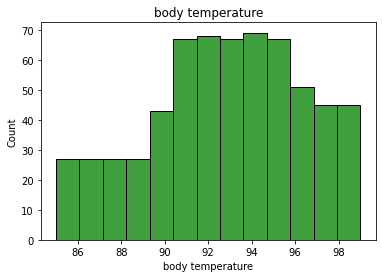

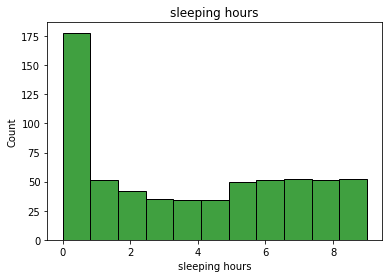

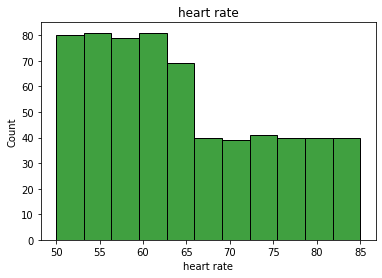

In [13]:
cols = ['bt', 'sh', 'hr']
for col in cols:
    sns.histplot(data = data, x = columns[col], color = 'green')
    plt.title(columns[col])
    plt.show()

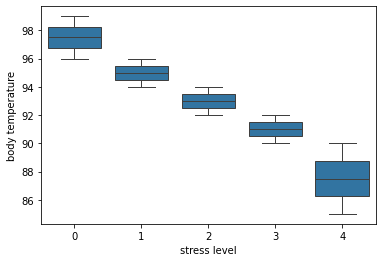

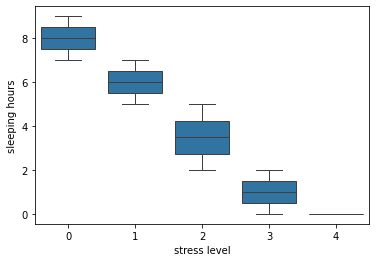

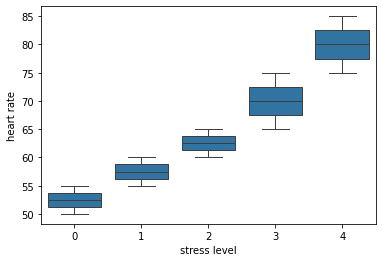

In [14]:
sl = columns['sl']
for col in cols:
    plt.figure()
    sns.boxplot(x = sl, y = columns[col], data = data)

In [15]:
X = data.drop(sl, axis = 1)
y = data[sl]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h3>KNN</h3>

In [17]:
for i in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Neighours: {i}; Accuracy: {accuracy:.2f}")


Neighours: 1; Accuracy: 1.00
Neighours: 2; Accuracy: 1.00
Neighours: 3; Accuracy: 1.00
Neighours: 4; Accuracy: 1.00
Neighours: 5; Accuracy: 1.00
Neighours: 6; Accuracy: 1.00
Neighours: 7; Accuracy: 1.00
Neighours: 8; Accuracy: 1.00
Neighours: 9; Accuracy: 1.00
Neighours: 10; Accuracy: 1.00
Neighours: 11; Accuracy: 1.00
Neighours: 12; Accuracy: 1.00
Neighours: 13; Accuracy: 1.00
Neighours: 14; Accuracy: 1.00
Neighours: 15; Accuracy: 1.00
Neighours: 16; Accuracy: 1.00
Neighours: 17; Accuracy: 1.00
Neighours: 18; Accuracy: 1.00
Neighours: 19; Accuracy: 1.00
Neighours: 20; Accuracy: 1.00
Neighours: 21; Accuracy: 1.00
Neighours: 22; Accuracy: 1.00
Neighours: 23; Accuracy: 1.00
Neighours: 24; Accuracy: 1.00
Neighours: 25; Accuracy: 1.00
Neighours: 26; Accuracy: 1.00
Neighours: 27; Accuracy: 1.00
Neighours: 28; Accuracy: 1.00
Neighours: 29; Accuracy: 1.00


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        35

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [19]:
print(confusion_matrix(y_test, y_pred))

[[35  0  0  0  0]
 [ 0 45  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 35]]


<h3>Decision Tree</h3>

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        35

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



In [22]:
print(confusion_matrix(y_test, y_pred))

[[33  2  0  0  0]
 [ 0 45  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 35]]


<h3>SVM</h3>

In [23]:
svc = SVC()
grid_params = {'kernel': ['rbf', 'linear', 'poly'],'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svc, grid_params)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        35

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [25]:
print(confusion_matrix(y_test, y_pred))

[[35  0  0  0  0]
 [ 0 45  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 35]]


<h3>Random Forest</h3>

In [26]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        35

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [28]:
print(confusion_matrix(y_test, y_pred))

[[35  0  0  0  0]
 [ 0 45  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 35]]


<h3>Ada Boost</h3>

In [37]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [36]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       1.00      0.00      0.00        45
           2       1.00      0.00      0.00        43
           3       0.26      1.00      0.41        31
           4       1.00      1.00      1.00        35

    accuracy                           0.52       189
   macro avg       0.85      0.59      0.48       189
weighted avg       0.88      0.52      0.43       189



In [31]:
print(confusion_matrix(y_test, y_pred))

[[33  0  0  2  0]
 [ 0  0  0 45  0]
 [ 0  0  0 43  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 35]]
